In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Exploratory Data Analysis

In [4]:
#read data
df = pd.read_csv('/content/mushrooms.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#data shape
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [7]:
#data types
print(type('df'))

<class 'str'>


In [8]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
#checking for null values
df.isnull().values.any()

False

In [10]:
#checking num of unique value in all columns
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [11]:
#checking for duplicated columns
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8119    False
8120    False
8121    False
8122    False
8123    False
Length: 8124, dtype: bool

There's no null or duplicated values in the dataset.

In [12]:
#data describe
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [13]:
#veil type is the same in every column and thus will be removed
#aside from the this, the data is already clean and doesn't require further processing


In [14]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64



```
`# This is formatted as code`
```

This dataset contains 4208 entries of edible mushroom characteristics, and 3916 poisnonous entries and is therefore balanced.

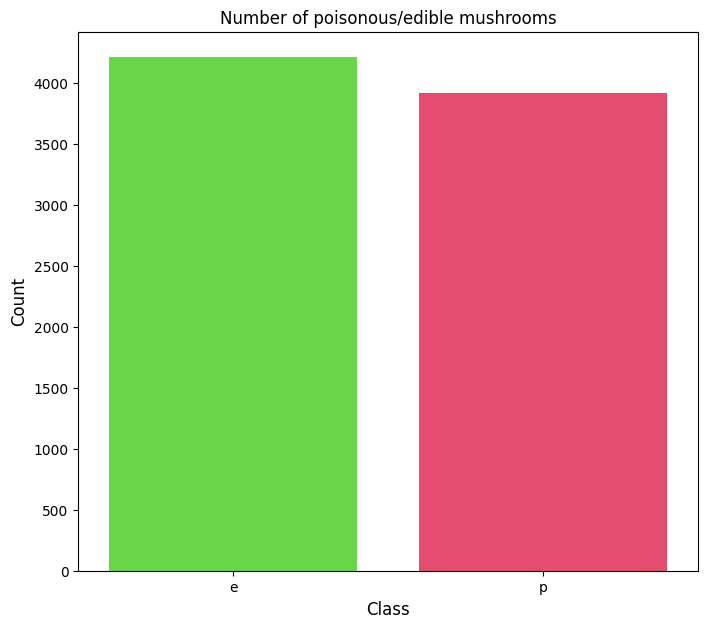

In [15]:
count = df['class'].value_counts()
x = count.index
y = count.values
plt.figure(figsize=(8,7))
sns.barplot(x=x, y=y, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')

plt.show()

Now let's take a quick look at distribution of the data.

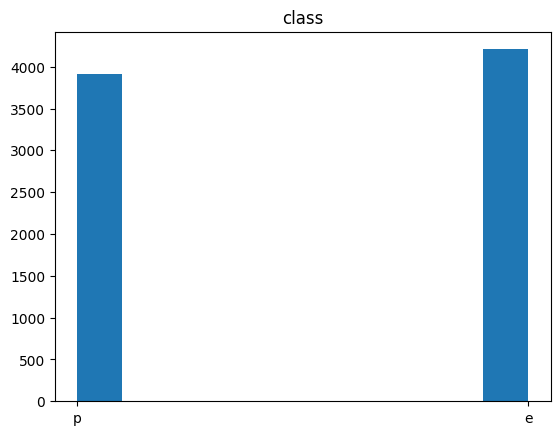

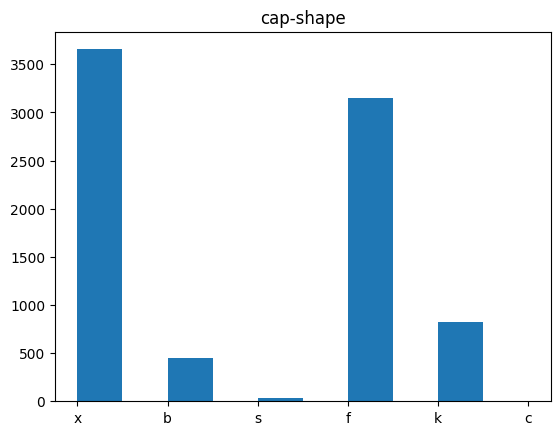

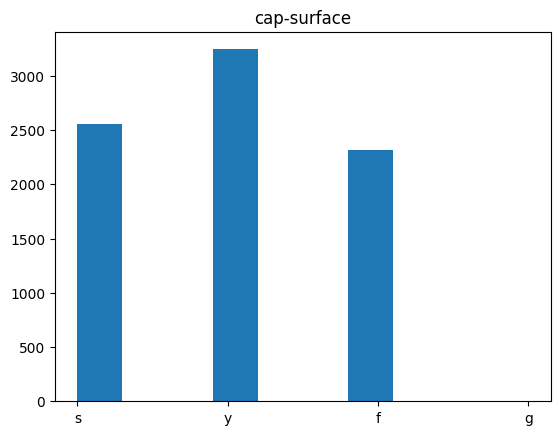

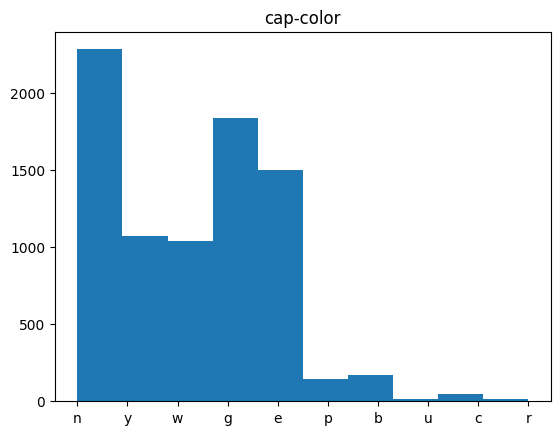

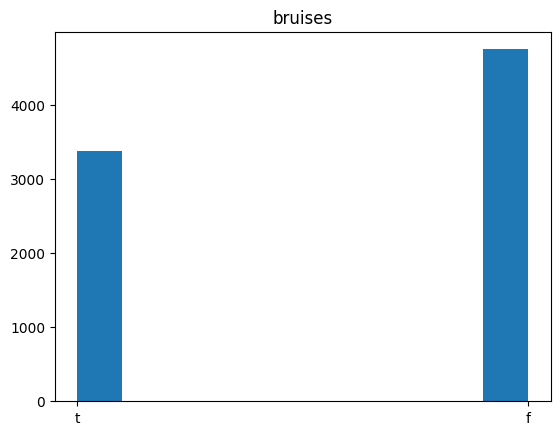

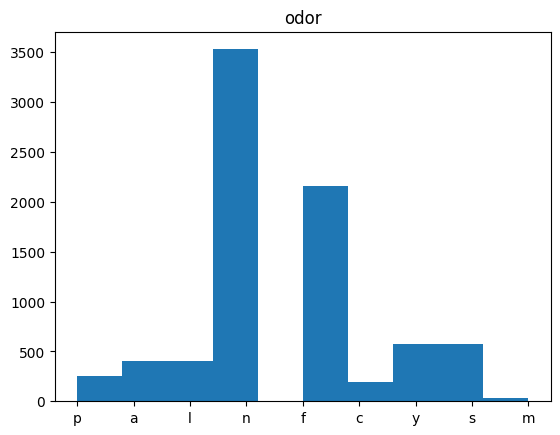

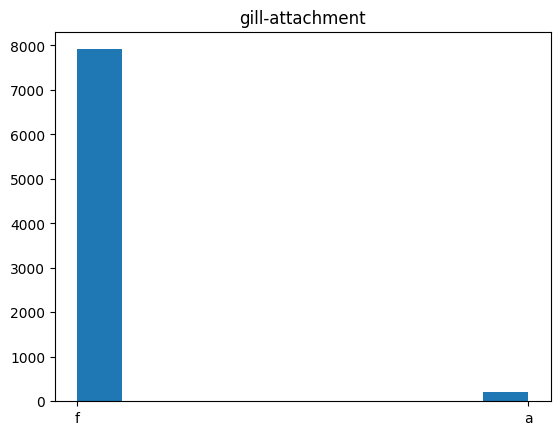

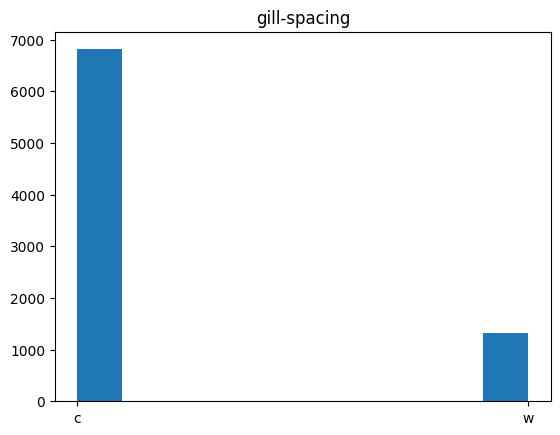

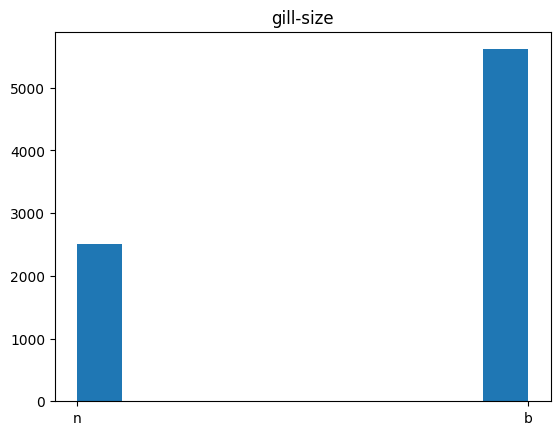

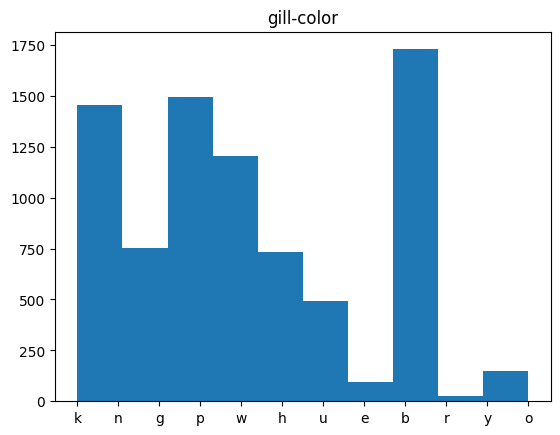

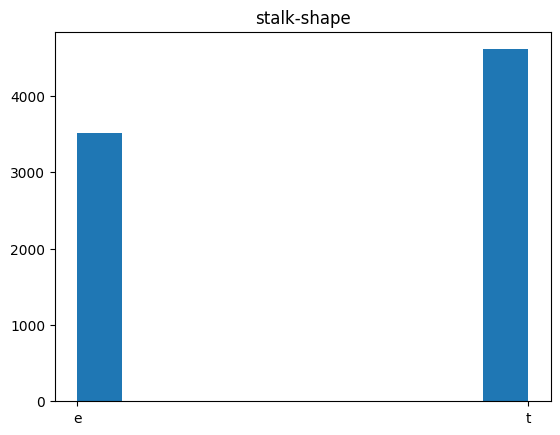

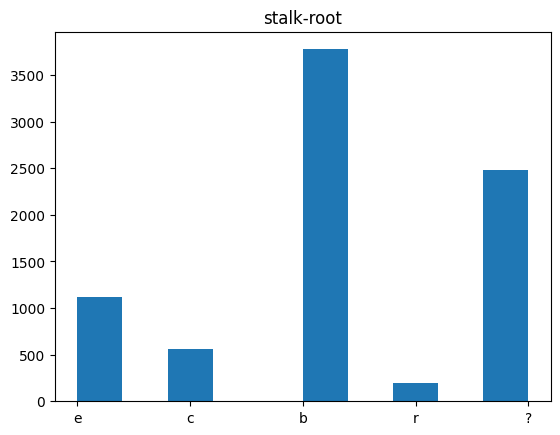

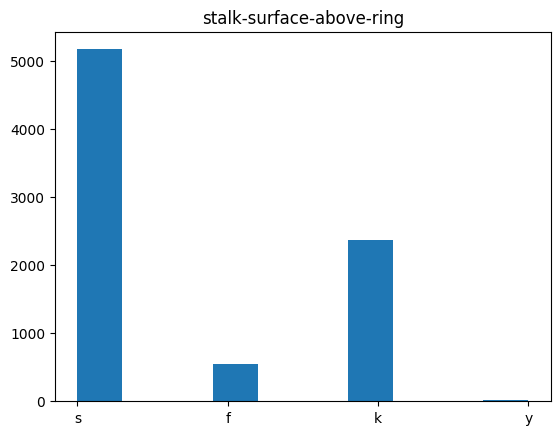

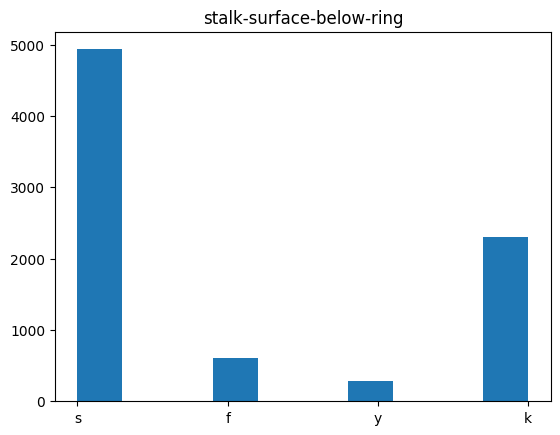

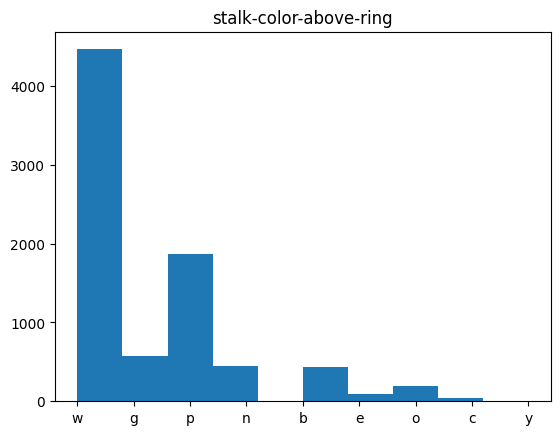

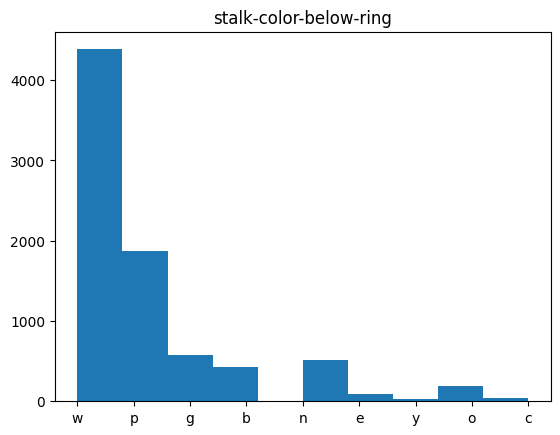

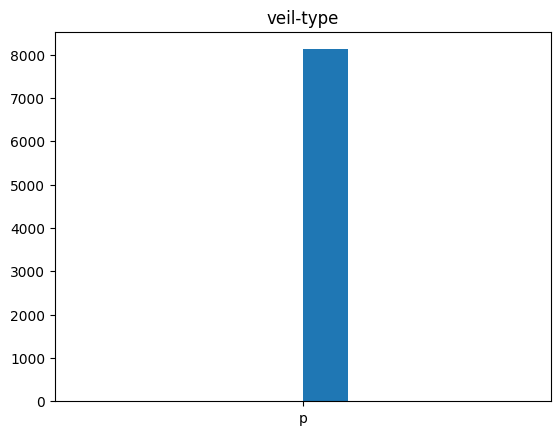

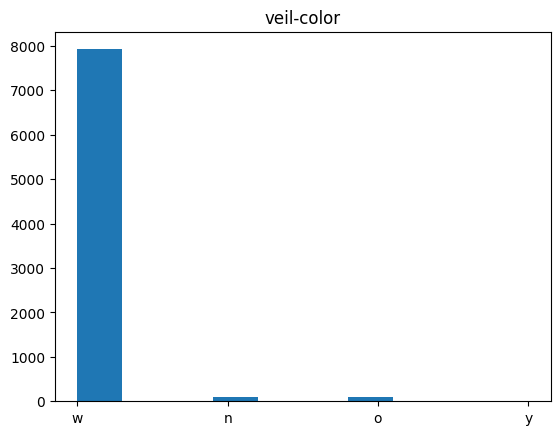

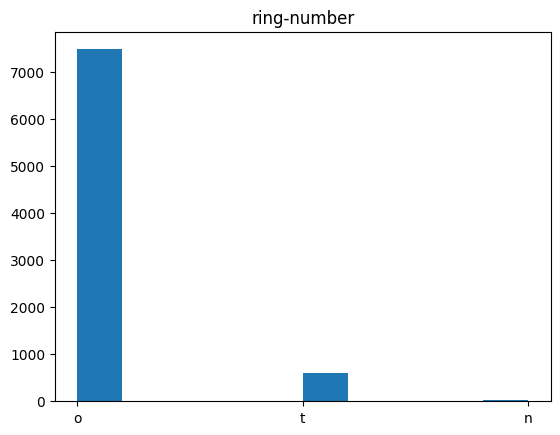

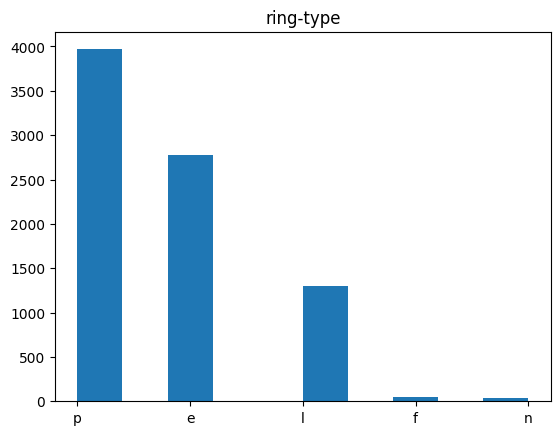

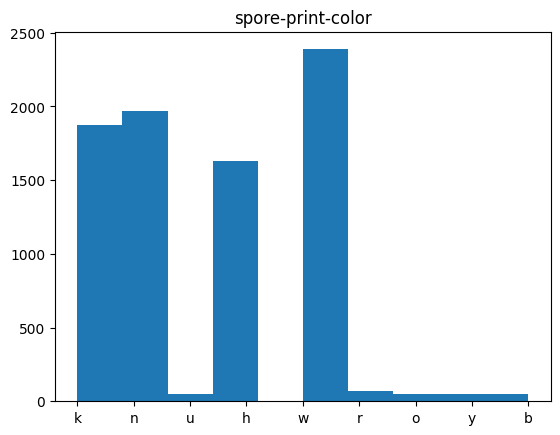

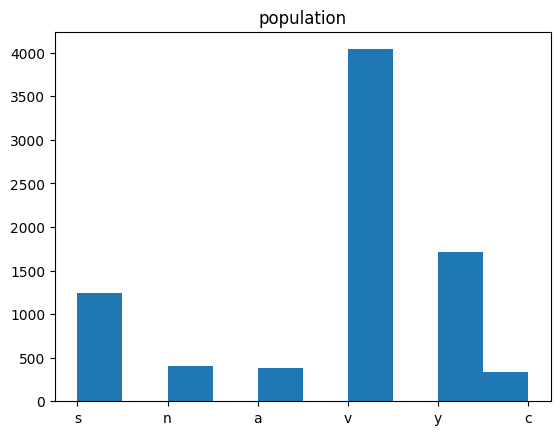

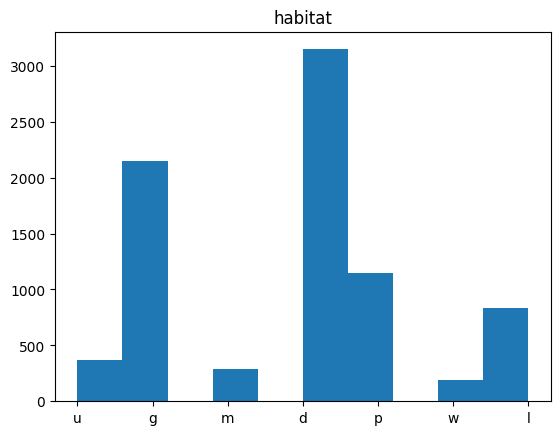

In [16]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

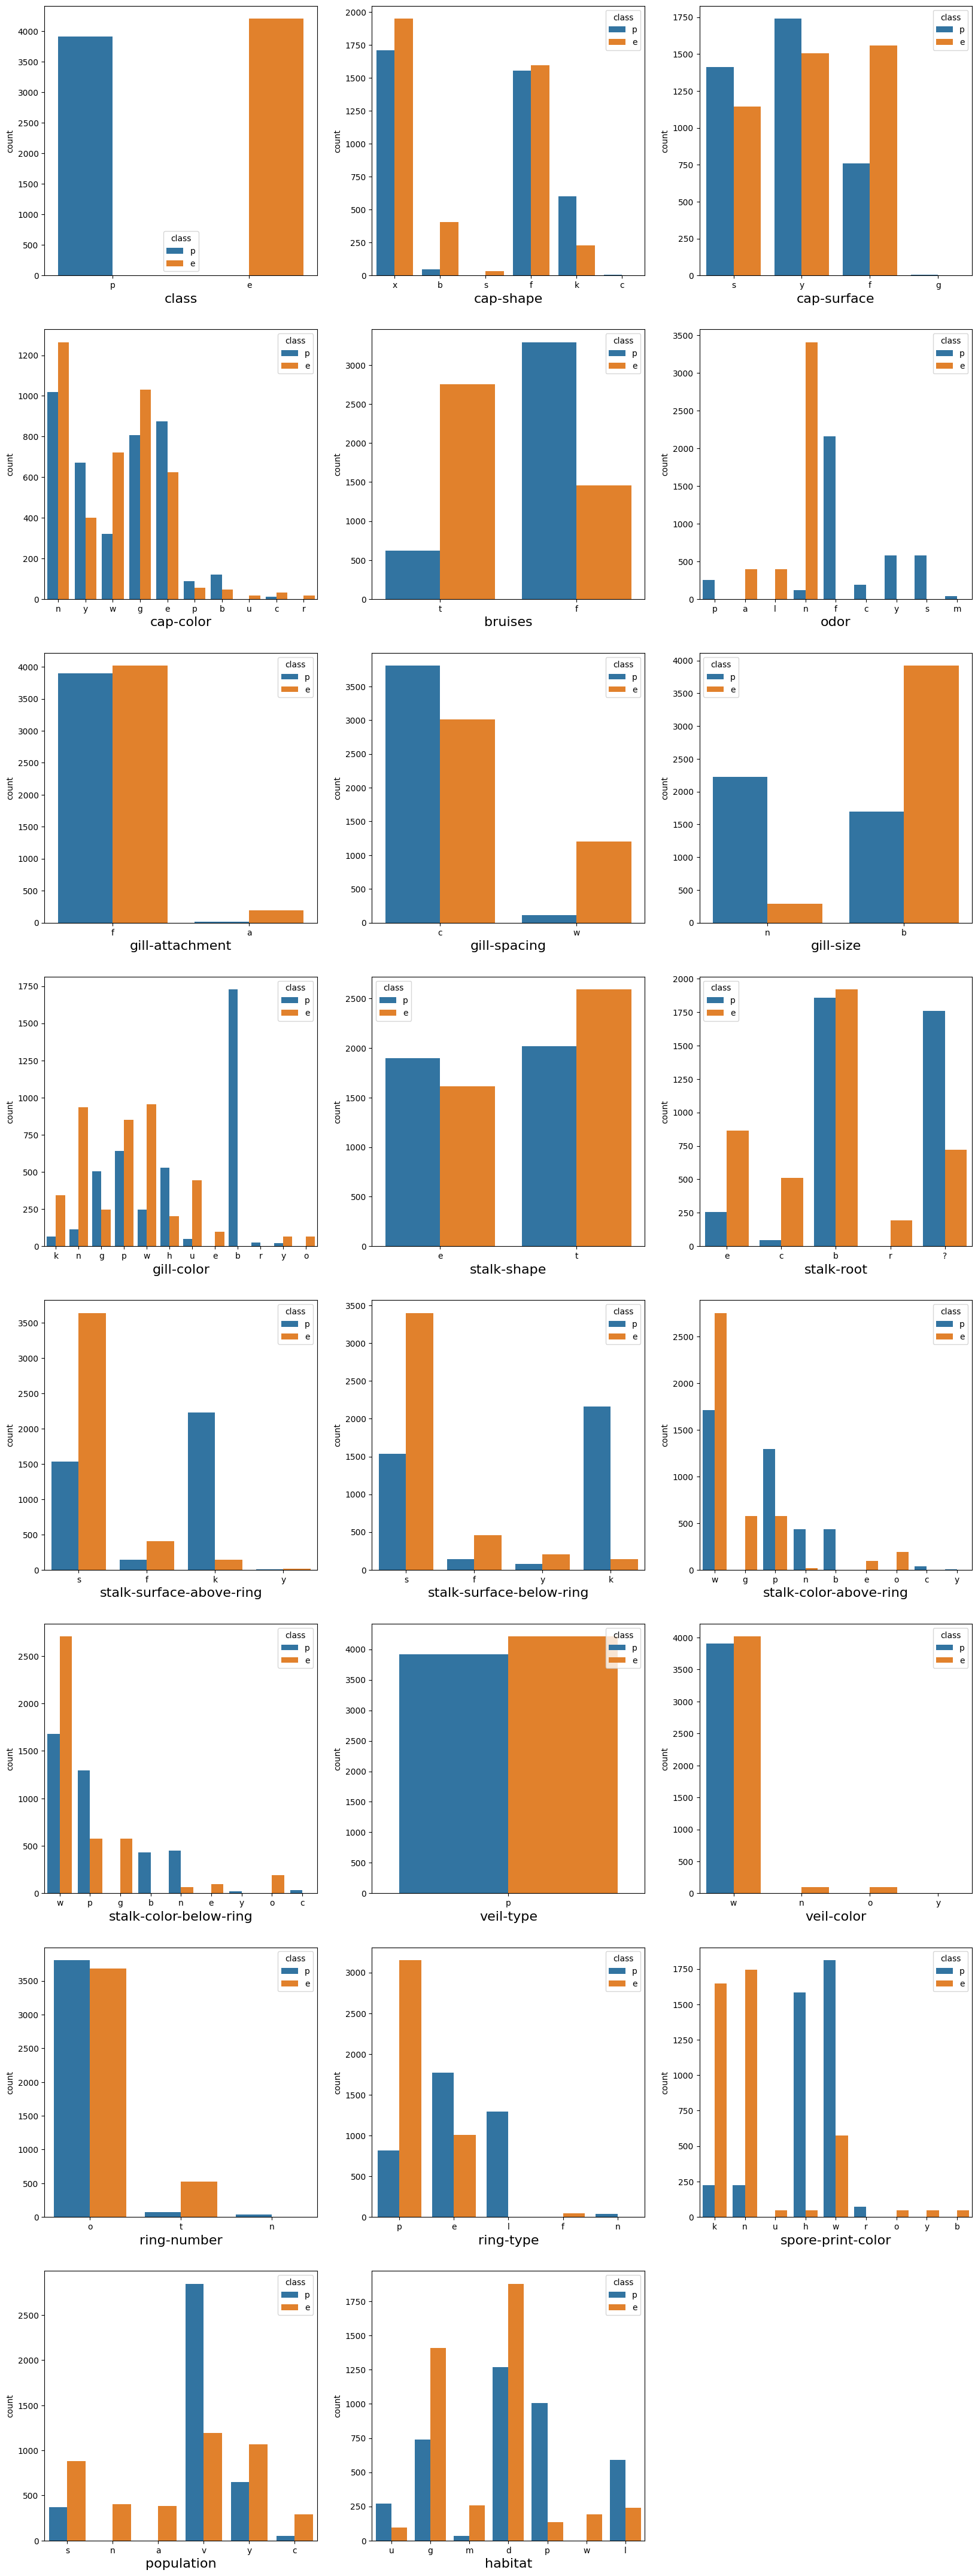

In [17]:
plt.figure(figsize = (20, 55))
plotnumber=1
for col in df.columns:
    plt.subplot(8,3,plotnumber)
    sns.countplot(x=df[col],hue="class",data=df)
    plt.xlabel(col,fontsize=16)
    plotnumber +=1
plt.show()

**Conclusions from EDA**

Many conclusions can be drawn from the bar graphs above.
* Sunken and conical mushrooms are edible, knobbed caps are more likely to be poisonous and bell caps are more likely to be edible.
* Fibrous cap surfaces are significantly more likely to be edible; grooved caps are edible
* Purple and green colored caps are edible, otherwise it's not particularly indicitive
* Mushrooms with bruises are more likely to be edible and those without bruises are more likely to be poisonous
* Mushroom odor is quite indicative of whether or not a muchroom is poisonous; those with no odor are most likely to be edible (but not necessarily), those with foul, fishy, spciy, pungent, creosote or musty odor are poisonous; anise or almond odor are edible
* Gill attachments are not particularly indicitive
* Crowded gills are more likely to be edible and close gills are slightly more likely to be poisonous
* Buff and green gill color is poisonous, red and orange are edible. Pink, white, brown, purple, black and yellow are more likely to be edible. Gray, chocolate are more likely to be poisonous.
* stalk shapes are not particularly indicitive
* rooted stalks are edible, and equal or club stalks are more likely to be edible. Bulbous stalks are more likely to be poisonous
* smooth and fibrous stalk surfaces above ring are more likely to be edible, whereas silky is more likely to be poisonous
    * the same trend is followed for stalk surfaces below the ring
* brown and orange veil colors are edible, yellow are poisonous and white is fairly evenly distributed
* Mushrooms with no rings are poisonous, those with two rings are more likely to be edible
* large and no ring types are poisonous, flaring is edible. Evanescent is more likely to be poisonous and pendant is more likely to be edible
* green spore prints are poisonous; oragen, yellow, buff and purple are edible; brown and black are more likely to be edible and white and chocolate are more likely to be poisonous
* Numerous and abundant populations are edible; solitary, scattered and clustered are more likely to be edible; several is more likely to be poisonous
* Mushrooms who live in waste habitats are edible; Those who live in woods, grasses, and meadows are more likely to be edible; those who live on paths or urban areas are more likely to be poisonous



# Prepare for Modeling

In [18]:
#label encode the data to prepare for modeling
#all columns in dataset are categorical so a for loop comes in handy
#label encoding is preferred for categorical variables
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])


In [19]:
#split data to x and y
X = df.drop('class', axis=1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [20]:
y =df['class']
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [21]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=1/3)


In [22]:
#scaling the data
sc = StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


*italicized text*# Modeling the Data

In [23]:
#Naive Bayes of scaled data
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)
gnb_pred = gnb.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1386
           1       0.92      0.92      0.92      1322

    accuracy                           0.92      2708
   macro avg       0.92      0.92      0.92      2708
weighted avg       0.92      0.92      0.92      2708





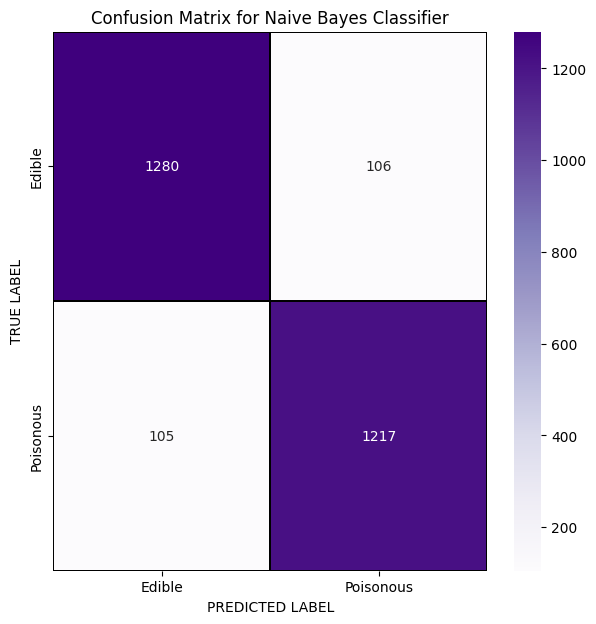

In [24]:
print(classification_report(y_test,gnb_pred))
print('\n')
cm = confusion_matrix(y_test, gnb_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

In [25]:
#Logistic Regression of scaled data
lr = LogisticRegression(max_iter=5000)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [26]:
lr_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1386
           1       0.96      0.94      0.95      1322

    accuracy                           0.95      2708
   macro avg       0.95      0.95      0.95      2708
weighted avg       0.95      0.95      0.95      2708





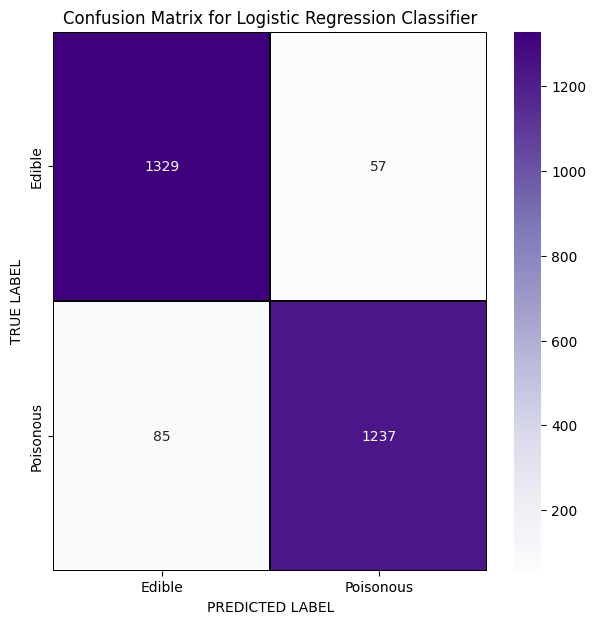

In [27]:
print(classification_report(y_test,lr_pred))
print('\n')
cm = confusion_matrix(y_test, lr_pred)

x_axis_labels = ["Edible","Poisonous"]
y_axis_labels = ["Edible","Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [28]:
#Decision Tree of scaled data
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1386
           1       1.00      1.00      1.00      1322

    accuracy                           1.00      2708
   macro avg       1.00      1.00      1.00      2708
weighted avg       1.00      1.00      1.00      2708





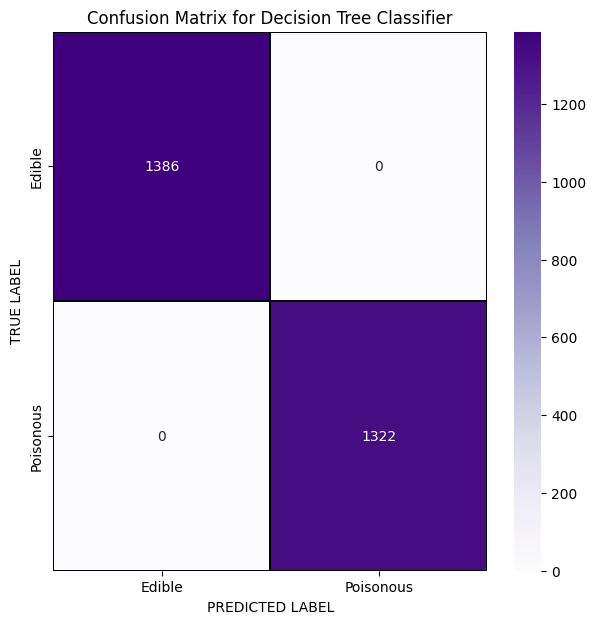

In [29]:
print(classification_report(y_test,dtc_pred))
print('\n')

cm = confusion_matrix(y_test, dtc_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [30]:
#Random Forest of scaled data
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
rf_pred = rf.predict(X_test_scaled)

#print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1386
           1       1.00      1.00      1.00      1322

    accuracy                           1.00      2708
   macro avg       1.00      1.00      1.00      2708
weighted avg       1.00      1.00      1.00      2708





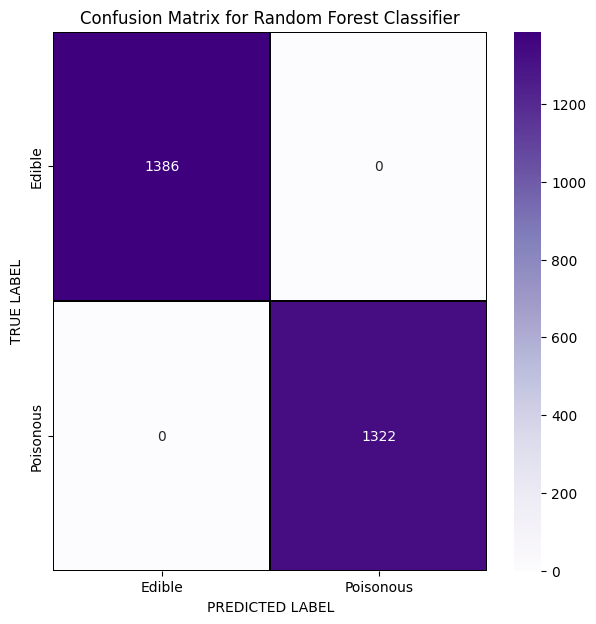

In [31]:
print(classification_report(y_test,rf_pred))
print('\n')
cm = confusion_matrix(y_test, rf_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [32]:
#K Nearest Neighbors of scaled data
knc = KNeighborsClassifier(2)
knc.fit(X_train_scaled,y_train)
knc_pred = knc.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1386
           1       1.00      1.00      1.00      1322

    accuracy                           1.00      2708
   macro avg       1.00      1.00      1.00      2708
weighted avg       1.00      1.00      1.00      2708





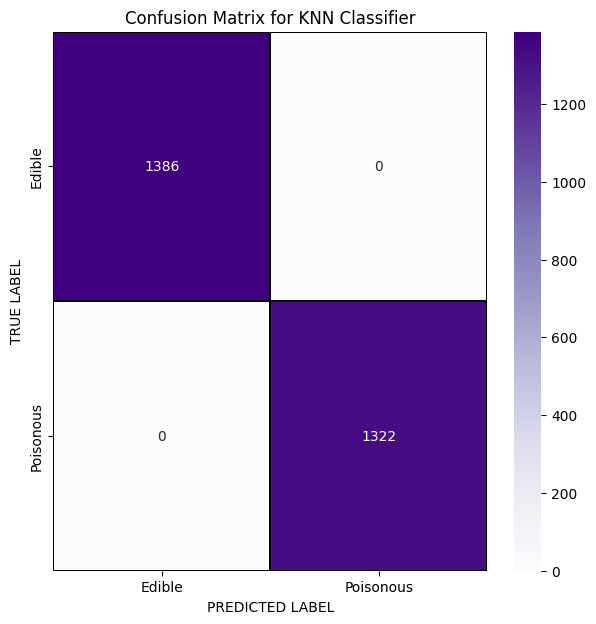

In [33]:
print(classification_report(y_test,knc_pred))
print('\n')

cm = confusion_matrix(y_test, knc_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [34]:
#XGBoost of scaled data
xgc = XGBClassifier()
xgc.fit(X_train_scaled,y_train)
xgc_pred = xgc.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1386
           1       1.00      1.00      1.00      1322

    accuracy                           1.00      2708
   macro avg       1.00      1.00      1.00      2708
weighted avg       1.00      1.00      1.00      2708





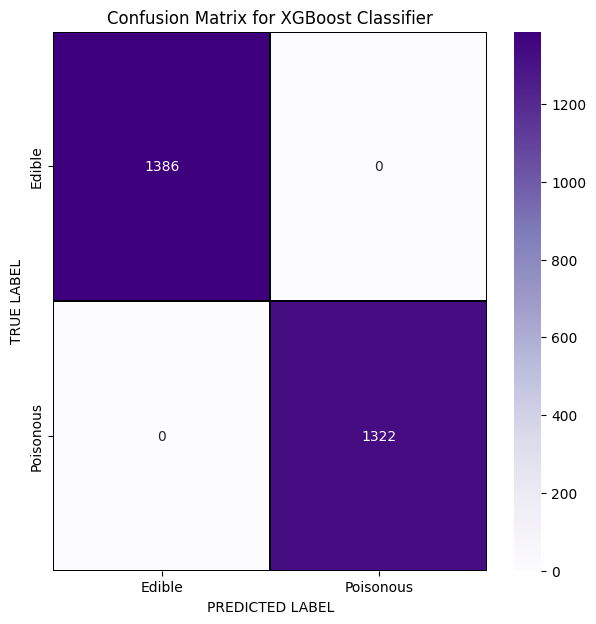

In [35]:
print(classification_report(y_test,xgc_pred))
print('\n')

cm = confusion_matrix(y_test, xgc_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

# Conclusions

Naive Bayes, Logistic Regression, Decision Tree, Random Forest, K Nearest Neighbors and XGBoost classifiers were used to model mushroom edibility. All classfiers except Naive Bayes and Logistic Regression had perfect precision, recall and accuracy, but don't appear to overfit the data. Many others who have modeled this dataset had similar results. There is not much needed to further improve the model based on the already impressive results.